# Telco Customer Churn Analysis

### by Yueh-Han Chen

### Dataset Overview

> "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]
https://www.kaggle.com/blastchar/telco-customer-churn  Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The raw data contains 7043 rows (customers) and 21 columns (features).
The “Churn” column is our target.


### Research Questions:
1. For those who unsubscribed the service, how long did them usually stay in the service? and what was their average LTV(Life Time Value)?

2. Relating to Question 1, what kinds of service they subscribed when they were still staying in subscription?

3. For those who are still paying the service, what was their average LTV(Life Time Value)? and how long did they usually stay in the service?

4. Relating to Question 3, what are the proportions of each kinds of service they are paying?

5. For those who are still in service and with LTV more than the LTV of leaked customers, which service they are paying the most?

6. For those who unsubscribed and still are subscibing the service, what is the proportion of each kinds of contract by each group?

7. Among 'gender', 'Partner', 'Dependents','PhoneService', 'InternetService', 'contract', and 'PaymentMethod', what variable affected the LTV the most?

## Data Wrangling

### Gather

In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [88]:
#load data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

### Data Assessing

In [11]:
# set up to view all the info of the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [47]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1614,3813-DHBBB,Male,0,Yes,No,67,No,No phone service,DSL,Yes,Yes,No,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),50.95,3521.7,No
1593,0620-XEFWH,Male,0,Yes,Yes,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.85,84.2,No
5133,6892-XPFPU,Male,1,Yes,No,24,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.25,2433.9,Yes
6072,3387-PLKUI,Female,0,Yes,Yes,13,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.80,251.25,No
6858,2685-SREOM,Female,0,Yes,Yes,25,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,89.10,2368.4,Yes
2750,1179-INLAT,Male,0,No,No,3,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.45,69.25,No
852,8713-IGZSO,Male,0,No,No,2,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,24.85,62,No
3452,8950-MTZNV,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,44.95,44.95,No
3328,1640-PLFMP,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.25,70.25,No
6161,4343-EJVQB,Male,0,No,No,7,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,74.35,533.6,No


In [27]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [68]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [34]:
df.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

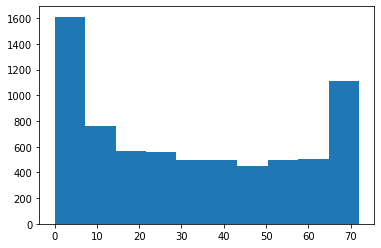

In [35]:
# show the distribution of tenure.
plt.hist(data = df, x = 'tenure');

> This is not a normal distribution, and with two peaks, which means there are likely two different kinds of groups of people, and either of them love particular services.

In [16]:
df[df.customerID.duplicated()].shape[0]

0

In [30]:
df.query('PhoneService == "No"').shape

(682, 21)

In [4]:
df.shape

(7043, 21)

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [89]:
# no missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [7]:
df[df.duplicated()].shape[0]

0

### Assessment report:

**Quality issues**

- The data type of "TotalCharges" should be float64 instead of object
- Many rows of total charges do not equal each tenues times monthly charges


### Data Cleaning

In [42]:
df_copy = df.copy()

**Issue: The data type of "TotalCharges" should be float64 instead of object**

**Define: give None value to all row, and then convert it to data type of float64**

#### Code

In [54]:
df_copy.TotalCharges = None
df_copy.TotalCharges=df_copy.TotalCharges.astype(float)

#### Test

In [55]:
df_copy.TotalCharges.dtype

dtype('float64')

**Issue: Many rows of total charges do not equal each tenures times monthly charges**

**Define: give them the values of each tenures times monthly charges**

#### Code

In [56]:
df_copy.TotalCharges = df_copy.tenure * df_copy.MonthlyCharges

#### Test

In [60]:
df_copy[df_copy.tenure * df_copy.MonthlyCharges != df_copy.TotalCharges].shape

(0, 21)

### Final step of Wrangling: Store data

In [61]:
# store the clean data
df_copy.reset_index(drop=True)
df_copy.to_csv('Telco-Customer-Churn_clean.csv')

In [7]:
#load data
clean_df = pd.read_csv('Telco-Customer-Churn_clean.csv')

## Exploratory Data Analysis

> Build Visualization Function: desc()

In [8]:
def desc(title=None, xscale=None, yscale=None, xlabel=None, ylabel=None, xlim=None, ylim=None, xticks1=None, xticks2=None, yticks1=None, yticks2=None,legend_title=None, legend_labels=None):
    if title:
        plt.title(title);
    if xscale:
        plt.xscale(xscale);
    if yscale:
        plt.yscale(yscale);
    if xlabel:
        plt.xlabel(xlabel);
    if ylabel:
        plt.ylabel(ylabel);
    if xlim:
        plt.xlim(xlim);
    if ylim:
        plt.ylim(ylim);
    if xticks1:
        plt.xticks(xticks1, xticks2);
    if yticks1:
        plt.yticks(yticks1, yticks2);
    if legend_title:
        plt.legend(title=legend_title);
        if legend_labels:
            plt.legend(title=legend_title, labels=legend_labels);

In [9]:
# Examine the distribution of TotalCharges
clean_df.TotalCharges.describe()

count    7043.000000
mean     2279.581350
std      2264.729447
min         0.000000
25%       394.000000
50%      1393.600000
75%      3786.100000
max      8550.000000
Name: TotalCharges, dtype: float64

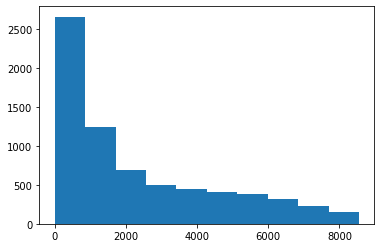

In [10]:
# Examine the distribution of TotalCharges
plt.hist(data = clean_df, x = 'TotalCharges');

## Research Question 1: For those who unsubscribed the service, what was their average LTV(Life Time Value)? and how long did they usually stay in the service?

In [11]:
# Extract those who unsubscribed the service
Churn_df = clean_df.query('Churn=="Yes"')

In [12]:
# Examnie the distribution of tenure
Churn_df.TotalCharges.describe()

count    1869.000000
mean     1531.608828
std      1886.774930
min        18.850000
25%       137.900000
50%       700.000000
75%      2334.800000
max      8481.600000
Name: TotalCharges, dtype: float64

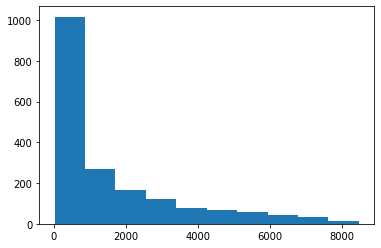

In [13]:
# Visualize
plt.hist(data = Churn_df, x = 'TotalCharges');

> I found that around 20% of the data are extremely high, so I decided to divide them to see each distribution of data.

In [14]:
#find the 80th percentile of the data in total charges
Churn_df.TotalCharges.quantile(0.8)

2827.5900000000006

In [15]:
# Divide the data by the 80th percentile of the data, and show the distribution of its TotalCharges under 80th percentile 
TotalCharges_under80 = Churn_df.query('TotalCharges<=2827.59')
TotalCharges_above80 = Churn_df.query('TotalCharges>2827.59')
TotalCharges_under80.TotalCharges.describe()

count    1495.000000
mean      713.561672
std       769.669864
min        18.850000
25%        85.900000
50%       377.600000
75%      1132.575000
max      2825.650000
Name: TotalCharges, dtype: float64

In [16]:
#show the distribution of its TotalCharges above 80th percentile
TotalCharges_above80.TotalCharges.describe()

count     374.000000
mean     4801.610160
std      1432.384076
min      2830.500000
25%      3523.275000
50%      4607.300000
75%      5863.450000
max      8481.600000
Name: TotalCharges, dtype: float64

In [17]:
#show the distribution of its tenure under 80th percentile
TotalCharges_under80.tenure.describe()

count    1495.000000
mean        9.933110
std        10.738504
min         1.000000
25%         1.000000
50%         6.000000
75%        15.000000
max        61.000000
Name: tenure, dtype: float64

In [18]:
#show the distribution of its tenure above 80th percentile
TotalCharges_above80.tenure.describe()

count    374.000000
mean      50.141711
std       12.322030
min       28.000000
25%       40.000000
50%       49.500000
75%       60.000000
max       72.000000
Name: tenure, dtype: float64

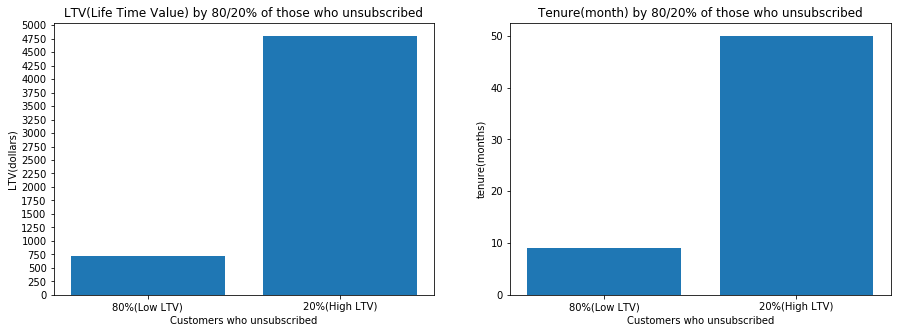

In [91]:
# Visualize both
plt.figure(figsize = [15, 5])
# left plot: LTV by above and under 80th percentile of data who unsubscribed
plt.subplot(1, 2, 1)
plt.bar([1, 2], [713, 4801])
desc(yticks1=range(0,5250,250), yticks2=range(0,5250,250), xticks1=[1,2],xticks2=['80%(Low LTV)', '20%(High LTV)'],ylabel='LTV(dollars)',xlabel='Customers who unsubscribed', title='LTV(Life Time Value) by 80/20% of those who unsubscribed')

# # right plot: Tenure by above and under 80th percentile of data who unsubscribed
plt.subplot(1, 2, 2)
plt.bar([1, 2], [9, 50])
desc(xticks1=[1,2],xticks2=['80%(Low LTV)', '20%(High LTV)'],ylabel='tenure(months)',xlabel='Customers who unsubscribed', title='Tenure(month) by 80/20% of those who unsubscribed')

> Note: The average LTV of 80% of those who unsubscribed is 750 dollars, and its tenures is near 10 months. On the other hand, the average LTV of top 20% of those who unsubscribed is 4750 dollars, and its tenures is near 50 months. And the ratio by the sum of total LTV by each groups is 750*4 : 4750 = 1 : 1.6, which suggests we should focus on serving those 20% customers with high LTV, which brought 60%(1.6/2.6) of our revennue.

## Research Question 2: Relating to Question 1, what kinds of service they subscribed when they were still staying in subscription?

> Note: Because I just found that there is a big difference in LTV and tenures between 80/20% of those who unsubscribed, so I decided to investigate this question in both 80/20% groups.

In [23]:
# Extract 80% with low LTV who used the internet service, and save each proportion of subsets of internet service 
#in the variable "proportion_internet_sub_service"
TotalCharges_under80_use_internet = TotalCharges_under80.query('InternetService!="No"')
proportion_internet_sub_service = np.array([TotalCharges_under80_use_internet.query('OnlineSecurity=="Yes"').shape[0]/TotalCharges_under80_use_internet.shape[0],
TotalCharges_under80_use_internet.query('TechSupport=="Yes"').shape[0]/TotalCharges_under80_use_internet.shape[0],
TotalCharges_under80_use_internet.query('OnlineBackup=="Yes"').shape[0]/TotalCharges_under80_use_internet.shape[0],
TotalCharges_under80_use_internet.query('DeviceProtection=="Yes"').shape[0]/TotalCharges_under80_use_internet.shape[0],
TotalCharges_under80_use_internet.query('StreamingTV=="Yes"').shape[0]/TotalCharges_under80_use_internet.shape[0],
TotalCharges_under80_use_internet.query('StreamingMovies=="Yes"').shape[0]/TotalCharges_under80_use_internet.shape[0]])*100

In [28]:
# Extract 20% with high LTV who used the internet service, and save each proportion of subsets of internet service 
#in the variable "proportion_internet_sub_service_above80"
TotalCharges_above80_use_internet = TotalCharges_above80.query('InternetService!="No"')
proportion_internet_sub_service_above80 = np.array([TotalCharges_above80_use_internet.query('OnlineSecurity=="Yes"').shape[0]/TotalCharges_above80_use_internet.shape[0],
TotalCharges_above80_use_internet.query('TechSupport=="Yes"').shape[0]/TotalCharges_above80_use_internet.shape[0],                                                
TotalCharges_above80_use_internet.query('OnlineBackup=="Yes"').shape[0]/TotalCharges_above80_use_internet.shape[0],
TotalCharges_above80_use_internet.query('DeviceProtection=="Yes"').shape[0]/TotalCharges_above80_use_internet.shape[0],
TotalCharges_above80_use_internet.query('StreamingTV=="Yes"').shape[0]/TotalCharges_above80_use_internet.shape[0],
TotalCharges_above80_use_internet.query('StreamingMovies=="Yes"').shape[0]/TotalCharges_above80_use_internet.shape[0]])*100

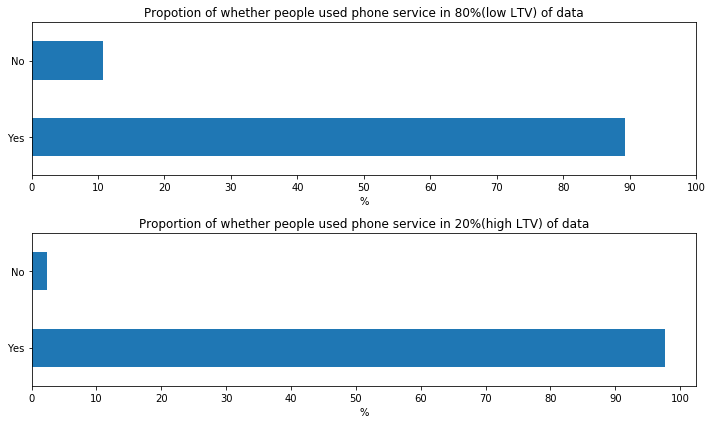

In [160]:
# Investigate the proportion of people used phone service by each groups
plt.figure(figsize = [10, 6])

plt.subplot(2, 1, 1)
# Group 1: 80%(low LTV) of data
((TotalCharges_under80.PhoneService.value_counts()/TotalCharges_under80.shape[0])*100).plot.barh();
desc(title="Propotion of whether people used phone service in 80%(low LTV) of data", xlabel="%",xticks1=range(0,110,10),xticks2=range(0,110,10))

plt.subplot(2, 1, 2)
# Group 2: 20%(high LTV) of data
((TotalCharges_above80.PhoneService.value_counts()/TotalCharges_above80.shape[0])*100).plot.barh();
desc(title="Proportion of whether people used phone service in 20%(high LTV) of data", xlabel="%",xticks1=range(0,110,10),xticks2=range(0,110,10))
plt.tight_layout()

> Note: 20%(high LTV) of data has only 2% who didn't use the phone service. On the other hand, 80%(low LTV) of data has 11% who didn't use the phone service, which is 5 times as much as the phone service proportion of 20%(high LTV) of data.

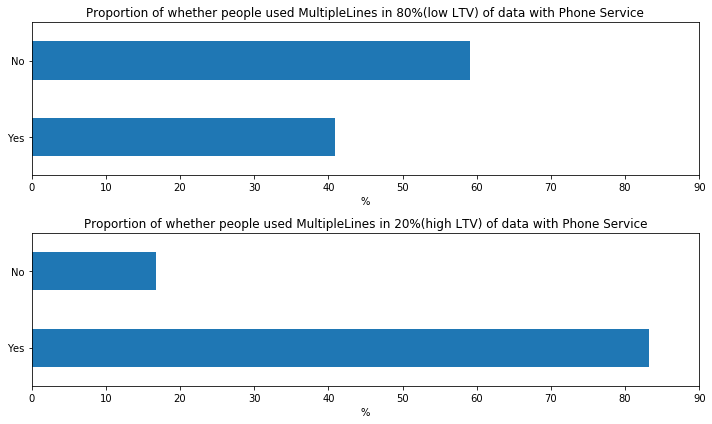

In [99]:
# Investigate the proportion of people who used phone service with muiltple lines by each groups
plt.figure(figsize = [10, 6])

plt.subplot(2, 1, 1)
# Group 1: 80%(low LTV) of data
TotalCharges_under80_use_phone = TotalCharges_under80.query('PhoneService=="Yes"')
(((TotalCharges_under80_use_phone.MultipleLines.value_counts()/TotalCharges_under80_use_phone.shape[0]).sort_values(ascending=True))*100).plot.barh();
desc(title="Proportion of whether people used MultipleLines in 80%(low LTV) of data with Phone Service", xlabel="%",xticks1=range(0,100,10),xticks2=range(0,100,10));

plt.subplot(2, 1, 2)
# Group 2: 20%(high LTV) of data
TotalCharges_above80_use_phone = TotalCharges_above80.query('PhoneService=="Yes"')
((TotalCharges_above80_use_phone.MultipleLines.value_counts()/TotalCharges_above80_use_phone.shape[0])*100).plot.barh();
desc(title="Proportion of whether people used MultipleLines in 20%(high LTV) of data with Phone Service", xlabel="%",xticks1=range(0,100,10),xticks2=range(0,100,10));

plt.tight_layout()

> Note: 20%(high LTV) of data of those who used phone service has 84% used multiple lines, which is 2 times as much as the proportion of multiple lines in 80%(low LTV) of data of those who used phone service.

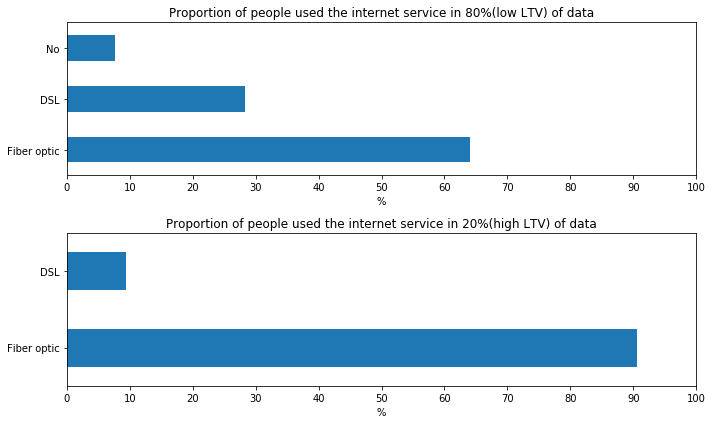

In [92]:
# Investigate proportion of people who used the internet service by each goups
plt.figure(figsize = [10, 6])

plt.subplot(2, 1, 1)
# Group 1: 80%(low LTV) of data
((TotalCharges_under80.InternetService.value_counts()/TotalCharges_under80.shape[0])*100).plot.barh();
desc(title="Proportion of people used the internet service in 80%(low LTV) of data", xlabel="%",xticks1=range(0,110,10),xticks2=range(0,110,10));

plt.subplot(2, 1, 2)
# Group 2: 20%(high LTV) of data
((TotalCharges_above80.InternetService.value_counts()/TotalCharges_above80.shape[0])*100).plot.barh();
desc(title="Proportion of people used the internet service in 20%(high LTV) of data", xlabel="%",xticks1=range(0,110,10),xticks2=range(0,110,10));

plt.tight_layout()

> Note: I found all of those with high LTV all used internet service. On the other hand, the 80% of those with low LTV has 8% did not use internet service. And, in 20%(high LTV) of data , there is 90% of people used fiber optic as their internet service.

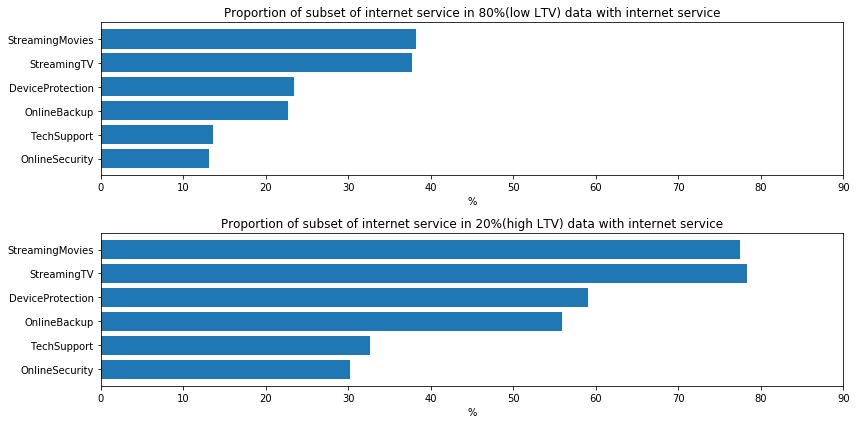

In [102]:
# Investigate the Proportion by subset of internet service by each groups
plt.figure(figsize = [12, 6])

plt.subplot(2, 1, 1)
# Group 1: 80%(low LTV) of data
plt.barh(range(0,6), proportion_internet_sub_service)
desc(title='Proportion of subset of internet service in 80%(low LTV) data with internet service',xlabel="%",yticks1=range(0,6),yticks2=['OnlineSecurity','TechSupport','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies'],xticks1=range(0,100,10),xticks2=range(0,100,10))
plt.subplot(2, 1, 2)
# Group 2: 20%(high LTV) of data
plt.barh(range(0,6), proportion_internet_sub_service_above80)
desc(title='Proportion of subset of internet service in 20%(high LTV) data with internet service',xlabel="%",yticks1=range(0,6),yticks2=['OnlineSecurity','TechSupport','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies'],xticks1=range(0,100,10),xticks2=range(0,100,10))
plt.tight_layout()

> Note: 
1. The proportion of streaming movies and streaming tv service in 20%(high LTV) of data are both near 80%, which is 2 times as much as the corresponded proportion in 80%(low LTV) of data.
2. The proportion of device protection and online backup service are both near 58%, which is 2.5-3 times as much as the corresponded proportion in 80%(low LTV) of data.
3. The proportion of tech support and online security service are both near 31%, which is near 2.5-3 times as much as the corresponded proportion in 80%(low LTV) of data.

## Research Question 3: For those who are still paying the service, what was their average LTV(Life Time Value)? and how long did they usually stay in the service?

In [133]:
# Extract those who are paying the service
paying_df = clean_df.query('Churn=="No"')

In [134]:
paying_df.TotalCharges.describe()

count    5174.000000
mean     2549.770883
std      2328.399619
min         0.000000
25%       574.562500
50%      1687.125000
75%      4244.812500
max      8550.000000
Name: TotalCharges, dtype: float64

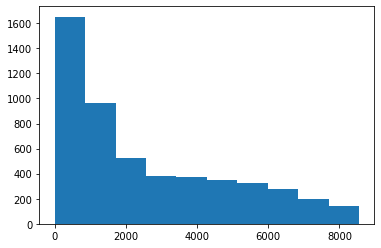

In [135]:
# Visualize
plt.hist(data = paying_df, x = 'TotalCharges');

> Note: In order to equally invesetigate data, I decided to divide the data into 80/20% as last two questions

In [136]:
#find the 80th percentile of the data in total charges
paying_df.TotalCharges.quantile(0.8)

4890.720000000001

In [ ]:
paying_TotalCharges_under80.

In [303]:
# Divide the data by the 80th percentile of the data, and show the distribution of its TotalCharges under 80th percentile 
paying_TotalCharges_under80 = paying_df.query('TotalCharges<=4890')
paying_TotalCharges_above80 = paying_df.query('TotalCharges>4890')
paying_TotalCharges_under80.TotalCharges.mean(),paying_TotalCharges_above80.TotalCharges.mean()

(1589.5728195216232, 6389.635410628021)

In [140]:
paying_TotalCharges_under80.tenure.mean(),paying_TotalCharges_above80.tenure.mean()

(30.60207779656922, 65.43478260869566)

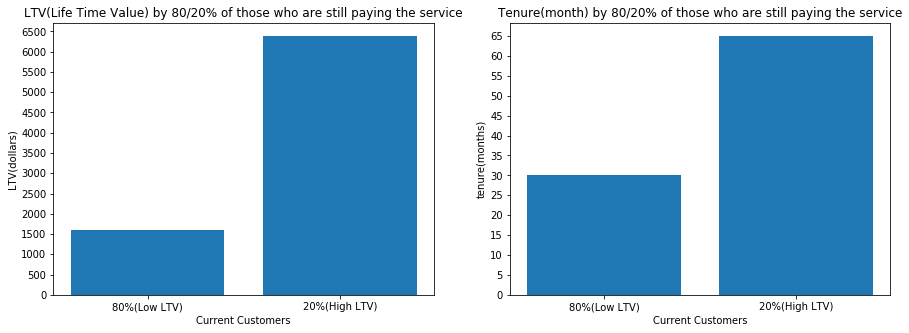

In [144]:
# Visualize both
plt.figure(figsize = [15, 5])
# left plot: LTV by above and under 80th percentile of data who are still paying the service
plt.subplot(1, 2, 1)
plt.bar([1, 2], [1589, 6389])
desc(yticks1=range(0,7000,500), yticks2=range(0,7000,500), xticks1=[1,2],xticks2=['80%(Low LTV)', '20%(High LTV)'],ylabel='LTV(dollars)',xlabel='Current Customers', title='LTV(Life Time Value) by 80/20% of those who are still paying the service')

# # right plot: Tenure by above and under 80th percentile of data who are still paying the service
plt.subplot(1, 2, 2)
plt.bar([1, 2], [30, 65])
desc(yticks1=range(0,70,5), yticks2=range(0,70,5), xticks1=[1,2],xticks2=['80%(Low LTV)', '20%(High LTV)'],ylabel='tenure(months)',xlabel='Current Customers', title='Tenure(month) by 80/20% of those who are still paying the service')

> Note:  The mean LTV in 80%(low LTV) of data is 1589, and the one in 20%(high LTV) of data is 6389. The mean tenures in 80%(low LTV) of data is 30, and the one in 20%(high LTV) of data is 65. And the ratio by the sum of total LTV by each groups is 1590*4 : 6389 = 1 : 1, which suggests we should focus on serving those 20% customers with high LTV, which brought 50%(1/2) of our revenue.

## Research Question 4: Relating to Question 3, what are the proportions of each kinds of service they are paying?

> Note: Because There is a big difference in LTV and tenures between 80/20% of data of current customers, so I decided to investigate this question in both 80/20% groups.

In [301]:
# Extract 80% with low LTV who used the internet service, and save each proportion of subsets of internet service 
#in the variable "proportion_internet_sub_service"
paying_TotalCharges_under80_use_internet = paying_TotalCharges_under80.query('InternetService!="No"')
paying_proportion_internet_sub_service_under80 = np.array([paying_TotalCharges_under80_use_internet.query('OnlineSecurity=="Yes"').shape[0]/paying_TotalCharges_under80_use_internet.shape[0],
paying_TotalCharges_under80_use_internet.query('TechSupport=="Yes"').shape[0]/paying_TotalCharges_under80_use_internet.shape[0],
paying_TotalCharges_under80_use_internet.query('OnlineBackup=="Yes"').shape[0]/paying_TotalCharges_under80_use_internet.shape[0],
paying_TotalCharges_under80_use_internet.query('DeviceProtection=="Yes"').shape[0]/paying_TotalCharges_under80_use_internet.shape[0],
paying_TotalCharges_under80_use_internet.query('StreamingTV=="Yes"').shape[0]/paying_TotalCharges_under80_use_internet.shape[0],
paying_TotalCharges_under80_use_internet.query('StreamingMovies=="Yes"').shape[0]/paying_TotalCharges_under80_use_internet.shape[0]])*100

In [305]:
# Extract 20% with high LTV who used the internet service, and save each proportion of subsets of internet service 
#in the variable "proportion_internet_sub_service_above80"
paying_TotalCharges_above80_use_internet = TotalCharges_above80.query('InternetService!="No"')
paying_proportion_internet_sub_service_above80 = np.array([paying_TotalCharges_above80.query('OnlineSecurity=="Yes"').shape[0]/paying_TotalCharges_above80.shape[0],
paying_TotalCharges_above80.query('TechSupport=="Yes"').shape[0]/paying_TotalCharges_above80.shape[0],                                                
paying_TotalCharges_above80.query('OnlineBackup=="Yes"').shape[0]/paying_TotalCharges_above80.shape[0],
paying_TotalCharges_above80.query('DeviceProtection=="Yes"').shape[0]/paying_TotalCharges_above80.shape[0],
paying_TotalCharges_above80.query('StreamingTV=="Yes"').shape[0]/paying_TotalCharges_above80.shape[0],
paying_TotalCharges_above80.query('StreamingMovies=="Yes"').shape[0]/paying_TotalCharges_above80.shape[0]])*100

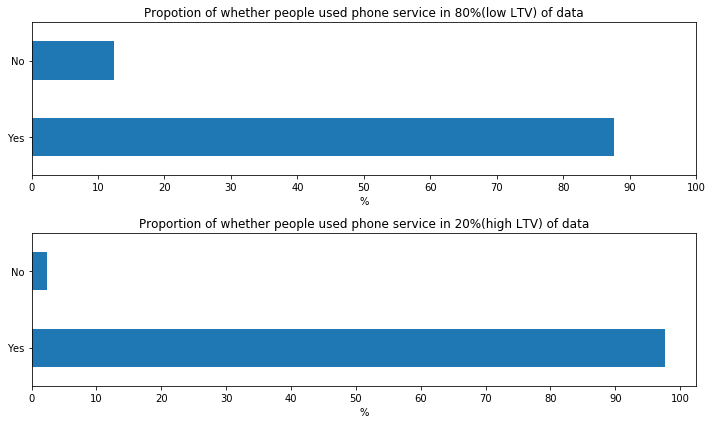

In [147]:
# Investigate the proportion of people used phone service by each groups
plt.figure(figsize = [10, 6])

plt.subplot(2, 1, 1)
# Group 1: 80%(low LTV) of data
((paying_TotalCharges_under80.PhoneService.value_counts()/paying_TotalCharges_under80.shape[0])*100).plot.barh();
desc(title="Propotion of whether people used phone service in 80%(low LTV) of data", xlabel="%",xticks1=range(0,110,10),xticks2=range(0,110,10))

plt.subplot(2, 1, 2)
# Group 2: 20%(high LTV) of data
((paying_TotalCharges_above80.PhoneService.value_counts()/paying_TotalCharges_above80.shape[0])*100).plot.barh();
desc(title="Proportion of whether people used phone service in 20%(high LTV) of data", xlabel="%",xticks1=range(0,110,10),xticks2=range(0,110,10))
plt.tight_layout()

> Note: 20%(high LTV) of data has only 2% who didn't use the phone service. On the other hand, 80%(low LTV) of data has 11% who didn't use the phone service, which is 5 times as much as the phone service proportion of 20%(high LTV) of data.

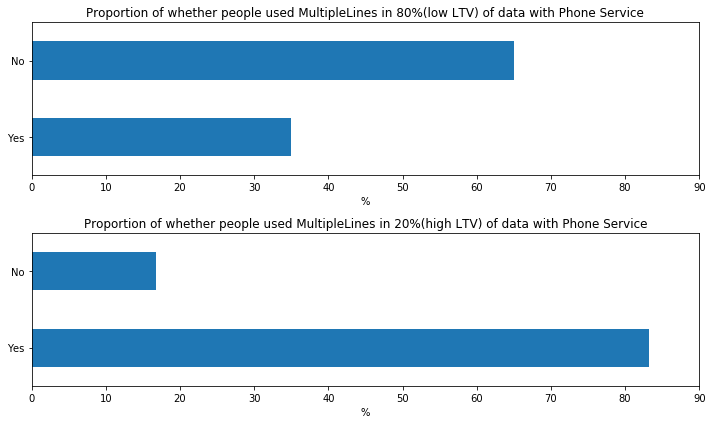

In [148]:
# Investigate the proportion of people who used phone service withn muiltple lines by each groups
plt.figure(figsize = [10, 6])

plt.subplot(2, 1, 1)
# Group 1: 80%(low LTV) of data
paying_TotalCharges_under80_use_phone = paying_TotalCharges_under80.query('PhoneService=="Yes"')
(((paying_TotalCharges_under80_use_phone.MultipleLines.value_counts()/paying_TotalCharges_under80_use_phone.shape[0]).sort_values(ascending=True))*100).plot.barh();
desc(title="Proportion of whether people used MultipleLines in 80%(low LTV) of data with Phone Service", xlabel="%",xticks1=range(0,100,10),xticks2=range(0,100,10));

plt.subplot(2, 1, 2)
# Group 2: 20%(high LTV) of data
paying_TotalCharges_above80_use_phone = paying_TotalCharges_above80.query('PhoneService=="Yes"')
((paying_TotalCharges_above80_use_phone.MultipleLines.value_counts()/paying_TotalCharges_above80_use_phone.shape[0])*100).plot.barh();
desc(title="Proportion of whether people used MultipleLines in 20%(high LTV) of data with Phone Service", xlabel="%",xticks1=range(0,100,10),xticks2=range(0,100,10));

plt.tight_layout()

> Note: 20%(high LTV) of data of those who used phone service has 83% used multiple lines, which is 2.4 times as much as the proportion of multiple lines in 80%(low LTV) of data of those who used phone service.

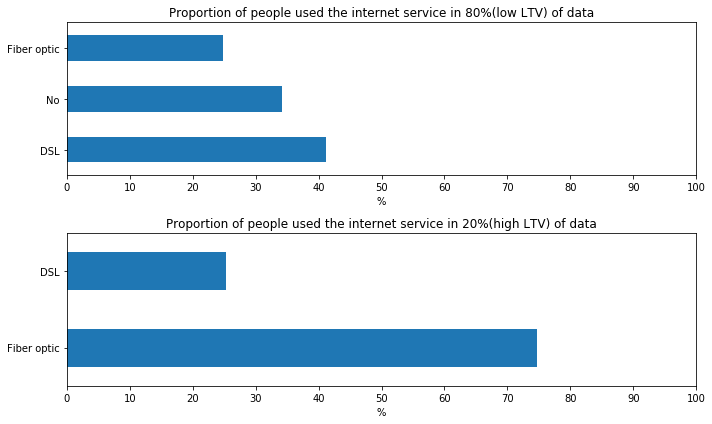

In [304]:
# VInvestigate proportion of people who used the internet service by each goups
plt.figure(figsize = [10, 6])

plt.subplot(2, 1, 1)
# Group 1: 80%(low LTV) of data
((paying_TotalCharges_under80.InternetService.value_counts()/paying_TotalCharges_under80.shape[0])*100).plot.barh();
desc(title="Proportion of people used the internet service in 80%(low LTV) of data", xlabel="%",xticks1=range(0,110,10),xticks2=range(0,110,10));

plt.subplot(2, 1, 2)
# Group 2: 20%(high LTV) of data
((paying_TotalCharges_above80.InternetService.value_counts()/paying_TotalCharges_above80.shape[0])*100).plot.barh();
desc(title="Proportion of people used the internet service in 20%(high LTV) of data", xlabel="%",xticks1=range(0,110,10),xticks2=range(0,110,10));

plt.tight_layout()

> Note: I found all of those with high LTV all used internet service. On the other hand, the 80% of those with low LTV has 33% did not use internet service. And, in 20%(high LTV) of data , there is 90% of people used fiber optic as their internet service.

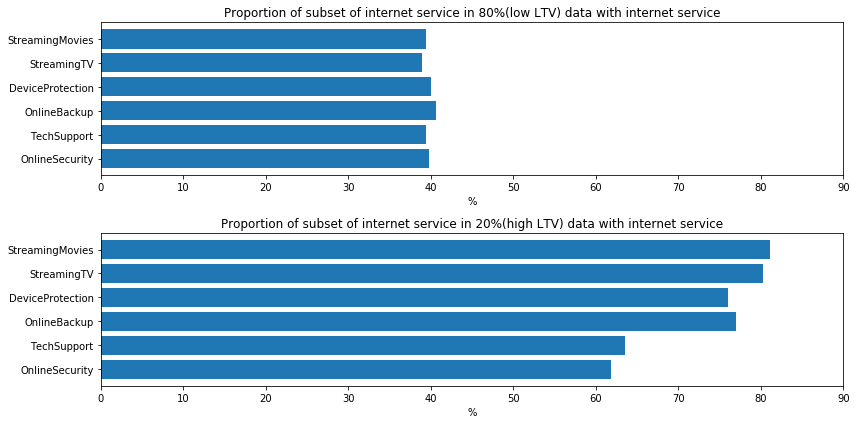

In [306]:
# Investigate the Proportion by subset of internet service by each groups
plt.figure(figsize = [12, 6])

plt.subplot(2, 1, 1)
# Group 1: 80%(low LTV) of data
plt.barh(range(0,6),paying_proportion_internet_sub_service_under80)
desc(title='Proportion of subset of internet service in 80%(low LTV) data with internet service',xlabel="%",yticks1=range(0,6),yticks2=['OnlineSecurity','TechSupport','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies'],xticks1=range(0,100,10),xticks2=range(0,100,10))
plt.subplot(2, 1, 2)
# Group 2: 20%(high LTV) of data
plt.barh(range(0,6), paying_proportion_internet_sub_service_above80)
desc(title='Proportion of subset of internet service in 20%(high LTV) data with internet service',xlabel="%",yticks1=range(0,6),yticks2=['OnlineSecurity','TechSupport','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies'],xticks1=range(0,100,10),xticks2=range(0,100,10))
plt.tight_layout()

> Note: 
1. All the proportions of each internet services in 80%(low LTV) of data are near 40%. 
2. In 20%(high LTV) of data, both streaming movies and streaming tv are near 80%, the proportions of both device protection and online backup are near 75%, and the proportions of techsupport and online seciroty are near 62%.

## Research Question 5: For those who are still in service with LTV more than the LTV of leaked customers, which service they are paying the most?

> Note: Based on above reseach questions, I also want to investigate this question by two diffrent groups: 80/20 

In [162]:
# The average LTV in 80%(low LTV) of data of leaked customers is 750
# The average LTV in 20%(high LTV) of data of leaked customers is 4750

# Extract the 80%(low LTV) of data that the LTV is higher than 750
paying_TotalCharges_under80_higherthanleak = paying_TotalCharges_under80.query('TotalCharges>750')
# Extract the 20%(high LTV) of data that the LTV is higher than 4750
paying_TotalCharges_above80_higherthanleak = paying_TotalCharges_above80.query('TotalCharges>4750')

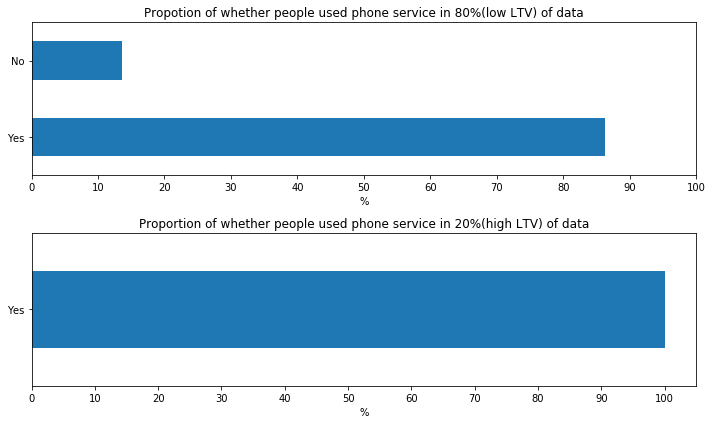

In [163]:
# Investigate the proportion of people used phone service by each groups
plt.figure(figsize = [10, 6])

plt.subplot(2, 1, 1)
# Group 1: 80%(low LTV) of data
((paying_TotalCharges_under80_higherthanleak.PhoneService.value_counts()/paying_TotalCharges_under80_higherthanleak.shape[0])*100).plot.barh();
desc(title="Propotion of whether people used phone service in 80%(low LTV) of data", xlabel="%",xticks1=range(0,110,10),xticks2=range(0,110,10))

plt.subplot(2, 1, 2)
# Group 2: 20%(high LTV) of data
((paying_TotalCharges_above80_higherthanleak.PhoneService.value_counts()/paying_TotalCharges_above80_higherthanleak.shape[0])*100).plot.barh();
desc(title="Proportion of whether people used phone service in 20%(high LTV) of data", xlabel="%",xticks1=range(0,110,10),xticks2=range(0,110,10))
plt.tight_layout()

> Note: 
1. In 80%(low LTV) of data of current customers, whose LTV are higher than the LTV In 80%(low LTV) of data of leaked customers, there are 86% are using phone service.
2. In 20%(high LTV) of data of current customers, whose LTV are higher than the LTV In 20%(high LTV) of data of leaked customers, there are 100% are using phone service.

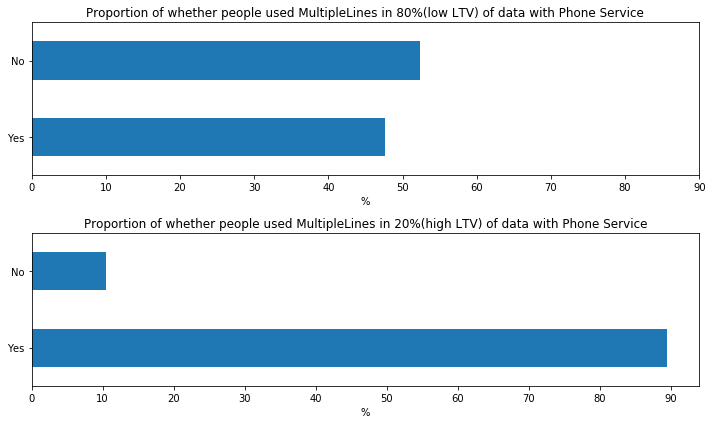

In [164]:
# Investigate the proportion of people who used phone service withn muiltple lines by each groups
plt.figure(figsize = [10, 6])

plt.subplot(2, 1, 1)
# Group 1: 80%(low LTV) of data
paying_TotalCharges_under80_use_phone_higherthanleak = paying_TotalCharges_under80_higherthanleak.query('PhoneService=="Yes"')
(((paying_TotalCharges_under80_use_phone_higherthanleak.MultipleLines.value_counts()/paying_TotalCharges_under80_use_phone_higherthanleak.shape[0]).sort_values(ascending=True))*100).plot.barh();
desc(title="Proportion of whether people used MultipleLines in 80%(low LTV) of data with Phone Service", xlabel="%",xticks1=range(0,100,10),xticks2=range(0,100,10));

plt.subplot(2, 1, 2)
# Group 2: 20%(high LTV) of data
paying_TotalCharges_above80_use_phone_higherthanleak = paying_TotalCharges_above80_higherthanleak.query('PhoneService=="Yes"')
((paying_TotalCharges_above80_use_phone_higherthanleak.MultipleLines.value_counts()/paying_TotalCharges_above80_use_phone_higherthanleak.shape[0])*100).plot.barh();
desc(title="Proportion of whether people used MultipleLines in 20%(high LTV) of data with Phone Service", xlabel="%",xticks1=range(0,100,10),xticks2=range(0,100,10));

plt.tight_layout()

> Note: 
1. In 80%(low LTV) of data of current customers, whose LTV are higher than the LTV In 80%(low LTV) of data of leaked customers, there are 48% using phone service with multiple lines.
2. In 20%(high LTV) of data of current customers, whose LTV are higher than the LTV In 20%(high LTV) of data of leaked customers, there are 89% are using phone service.

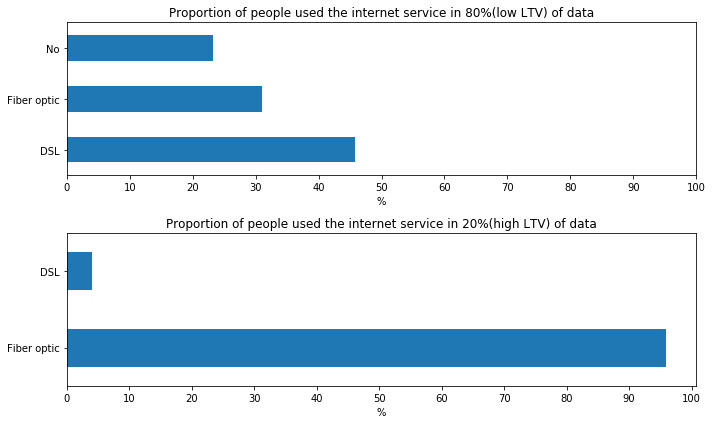

In [165]:
# VInvestigate proportion of people who used the internet service by each goups
plt.figure(figsize = [10, 6])

plt.subplot(2, 1, 1)
# Group 1: 80%(low LTV) of data
((paying_TotalCharges_under80_higherthanleak.InternetService.value_counts()/paying_TotalCharges_under80_higherthanleak.shape[0])*100).plot.barh();
desc(title="Proportion of people used the internet service in 80%(low LTV) of data", xlabel="%",xticks1=range(0,110,10),xticks2=range(0,110,10));

plt.subplot(2, 1, 2)
# Group 2: 20%(high LTV) of data
((paying_TotalCharges_above80_higherthanleak.InternetService.value_counts()/paying_TotalCharges_above80_higherthanleak.shape[0])*100).plot.barh();
desc(title="Proportion of people used the internet service in 20%(high LTV) of data", xlabel="%",xticks1=range(0,110,10),xticks2=range(0,110,10));

plt.tight_layout()

> Note: 
1. In 80%(low LTV) of data of current customers, whose LTV are higher than the LTV In 80%(low LTV) of data of leaked customers, there are 22% are not using internet service
2. In 20%(high LTV) of data of current customers, whose LTV are higher than the LTV In 20%(high LTV) of data of leaked customers, there are 100% are using internet service.

In [167]:
# Extract 80% with low LTV who used the internet service, and save each proportion of subsets of internet service 
#in the variable "proportion_internet_sub_service"
paying_TotalCharges_under80_use_internet_higherthanleak = paying_TotalCharges_under80_higherthanleak.query('InternetService!="No"')
paying_proportion_internet_sub_service_under80_higherthanleak = np.array([paying_TotalCharges_under80_use_internet_higherthanleak.query('OnlineSecurity=="Yes"').shape[0]/paying_TotalCharges_under80_use_internet_higherthanleak.shape[0],
paying_TotalCharges_under80_use_internet_higherthanleak.query('TechSupport=="Yes"').shape[0]/paying_TotalCharges_under80_use_internet_higherthanleak.shape[0],
paying_TotalCharges_under80_use_internet_higherthanleak.query('OnlineBackup=="Yes"').shape[0]/paying_TotalCharges_under80_use_internet_higherthanleak.shape[0],
paying_TotalCharges_under80_use_internet_higherthanleak.query('DeviceProtection=="Yes"').shape[0]/paying_TotalCharges_under80_use_internet_higherthanleak.shape[0],
paying_TotalCharges_under80_use_internet_higherthanleak.query('StreamingTV=="Yes"').shape[0]/paying_TotalCharges_under80_use_internet_higherthanleak.shape[0],
paying_TotalCharges_under80_use_internet_higherthanleak.query('StreamingMovies=="Yes"').shape[0]/paying_TotalCharges_under80_use_internet_higherthanleak.shape[0]])*100

In [172]:
# Extract 20% with high LTV who used the internet service, and save each proportion of subsets of internet service 
#in the variable "proportion_internet_sub_service_above80"
paying_TotalCharges_above80_higherthanleak = paying_TotalCharges_above80_higherthanleak.query('InternetService!="No"')
paying_proportion_internet_sub_service_above80_higherthanleak = np.array([paying_TotalCharges_above80_higherthanleak.query('OnlineSecurity=="Yes"').shape[0]/paying_TotalCharges_above80_higherthanleak.shape[0],
paying_TotalCharges_above80_higherthanleak.query('TechSupport=="Yes"').shape[0]/paying_TotalCharges_above80_higherthanleak.shape[0],                                                
paying_TotalCharges_above80_higherthanleak.query('OnlineBackup=="Yes"').shape[0]/paying_TotalCharges_above80_higherthanleak.shape[0],
paying_TotalCharges_above80_higherthanleak.query('DeviceProtection=="Yes"').shape[0]/paying_TotalCharges_above80_higherthanleak.shape[0],
paying_TotalCharges_above80_higherthanleak.query('StreamingTV=="Yes"').shape[0]/paying_TotalCharges_above80_higherthanleak.shape[0],
paying_TotalCharges_above80_higherthanleak.query('StreamingMovies=="Yes"').shape[0]/paying_TotalCharges_above80_higherthanleak.shape[0]])*100

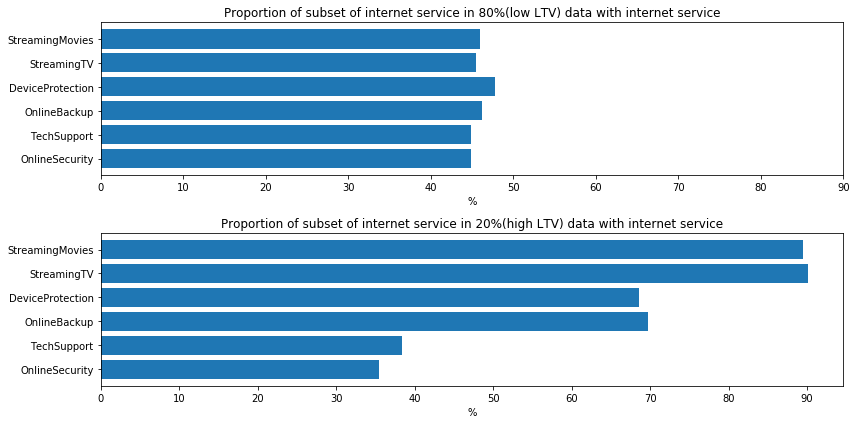

In [173]:
# Investigate the Proportion by subset of internet service by each groups
plt.figure(figsize = [12, 6])

plt.subplot(2, 1, 1)
# Group 1: 80%(low LTV) of data
plt.barh(range(0,6),paying_proportion_internet_sub_service_under80_higherthanleak)
desc(title='Proportion of subset of internet service in 80%(low LTV) data with internet service',xlabel="%",yticks1=range(0,6),yticks2=['OnlineSecurity','TechSupport','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies'],xticks1=range(0,100,10),xticks2=range(0,100,10))
plt.subplot(2, 1, 2)
# Group 2: 20%(high LTV) of data
plt.barh(range(0,6), paying_proportion_internet_sub_service_above80_higherthanleak)
desc(title='Proportion of subset of internet service in 20%(high LTV) data with internet service',xlabel="%",yticks1=range(0,6),yticks2=['OnlineSecurity','TechSupport','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies'],xticks1=range(0,100,10),xticks2=range(0,100,10))
plt.tight_layout()

> Note: 
1. In 80%(low LTV) of data of current customers, whose LTV are higher than the LTV In 80%(low LTV) of data of leaked customers, there are all the proportions of each internet services in 80%(low LTV) of data are near 45%. 
2. In 20%(high LTV) of data of current customers, whose LTV are higher than the LTV In 20%(high LTV) of data of leaked customers, both streaming movies and streaming tv are near 90%, the proportions of both device protection and online backup are near 70%, and the proportions of techsupport and online seciroty are near 37%.

## Research Question 6:  For two groups of those who leaked and still are paying the service, what is the proportion of each kinds of contract by each group?

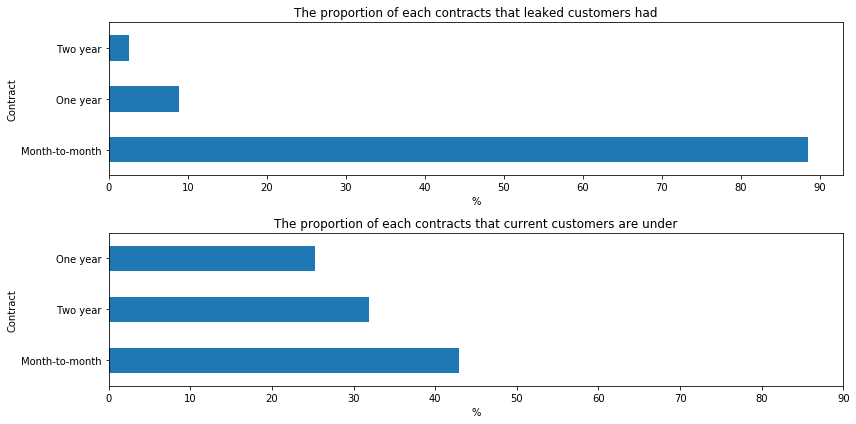

In [195]:
plt.figure(figsize = [12, 6])
# Visualize the plot of leaked customers
plt.subplot(2, 1, 1)
((Churn_df.Contract.value_counts()/Churn_df.shape[0])*100).plot.barh();
desc(xticks1=range(0,100,10),xticks2=range(0,100,10),ylabel='Contract',xlabel="%",title="The proportion of each contracts that leaked customers had")

# Visualize the plot of current customers
plt.subplot(2, 1, 2)
((paying_df.Contract.value_counts()/paying_df.shape[0])*100).plot.barh();
desc(xticks1=range(0,100,10),xticks2=range(0,100,10),ylabel='Contract',xlabel="%",title="The proportion of each contracts that current customers are under")
plt.tight_layout()

> Note:
1. In the data of leaked customers, there are 88% used month contract, 9% used one year contract, and 2 % two year contract. 
2. In the data of current customers, there are 43% using month contract, 25% used one year contract, and 32% two year contract.

## Research Question 7:  Among 'gender', 'Partner', 'Dependents','PhoneService', 'InternetService', 'contract', and 'PaymentMethod', what variable affected the LTV the most?

In [285]:
clean_df[['Female', 'Male']] = pd.get_dummies(clean_df['gender'])
clean_df[['No', 'Partner_Yes']] = pd.get_dummies(clean_df['Partner'])
clean_df[['Dependents_No', 'Dependents_Yes']] = pd.get_dummies(clean_df['Dependents'])
clean_df[['No', 'PhoneService_Yes']] = pd.get_dummies(clean_df['PhoneService'])
clean_df[['DSL', 'Fiber optic', 'No']] = pd.get_dummies(clean_df['InternetService'])
clean_df[['Month-to-month', 'One year', 'Two year']] = pd.get_dummies(clean_df['Contract'])
clean_df[['matBank transfer (autoic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']] = pd.get_dummies(clean_df['PaymentMethod'])

In [286]:
# use mutiple linear regression
clean_df['intercept'] = 1
lm = sm.OLS(clean_df['TotalCharges'], clean_df[['intercept', 'Male', 'Partner_Yes', 'Dependents_No',
                                               'PhoneService_Yes', 'DSL', 'Fiber optic', 'One year', 'Two year',
                                               'matBank transfer (autoic)', 'Credit card (automatic)', 
                                                'Electronic check']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           TotalCharges   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     928.1
Date:                Wed, 29 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:02:04   Log-Likelihood:                -61243.
No. Observations:                7043   AIC:                         1.225e+05
Df Residuals:                    7031   BIC:                         1.226e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
intercept                 -2408.0897     90.795    -26.522      0.000   -2586.075   -2230.105
Male                         35.3705     34.506      1.025      0.305     -32.272     103.013
Partner_Yes                 717.1189     40.290     17.799      0.000     638.138     796.100
Dependents_No               254.2784     43.314      5.871      0.000     169.371     339.186
PhoneService_Yes            662.5648     65.517     10.113      0.000     534.132     790.998
DSL                        2043.2198     52.409     38.986      0.000    1940.483    2145.957
Fiber optic                3412.4872     52.277     65.276      0.000    3310.008    3514.967
One year                   1897.2454     46.573     40.737      0.000    1805.947    1988.543
Two year                   2840.6051     48.427     58.658      0.000    2745.674    2935.536
matBank transfer (autoic)   583.9313     54.209     10.772      0.000     477.665     690.198
Credit card (automatic)     579.3687     54.315     10.667      0.000     472.895     685.842
Electronic check             32.3058     52.282      0.618      0.537     -70.183     134.795
==============================================================================
Omnibus:                      170.388   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.448
Skew:                           0.354   Prob(JB):                     9.72e-38
Kurtosis:                       2.719   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [291]:
results.params.sort_values()[3:]

Dependents_No                 254.278405
Credit card (automatic)       579.368673
matBank transfer (autoic)     583.931304
PhoneService_Yes              662.564814
Partner_Yes                   717.118948
One year                     1897.245382
DSL                          2043.219839
Two year                     2840.605106
Fiber optic                  3412.487222
dtype: float64

> Note:
1. 'gender' does not have statistical significance on affecting the LTV.
2. 'Partner' have statistical significance on affecting the LTV, whose coefficient correlation is 717.
3. 'Dependents' have statistical significance on affecting the LTV, whose coefficient correlation is 254.
4. 'PhoneService' have statistical significance on affecting the LTV, whose coefficient correlation is 662.
5. 'InternetService' have statistical significance on affecting the LTV, for 'DSL', whose coefficient correlation is 2043. And, for 'Fiber optic', whose coefficient correlation is 3412.
6. 'Contract' have statistical significance on affecting the LTV, for 'One year', whose coefficient correlation is 1897. And, for 'Two year', whose coefficient correlation is 2840.
7. 'PaymentMethod' have statistical significance on affecting the LTV, for 'matBank transfer', whose coefficient correlation is 583. And, for 'Credit card (automatic)', whose coefficient correlation is 579.

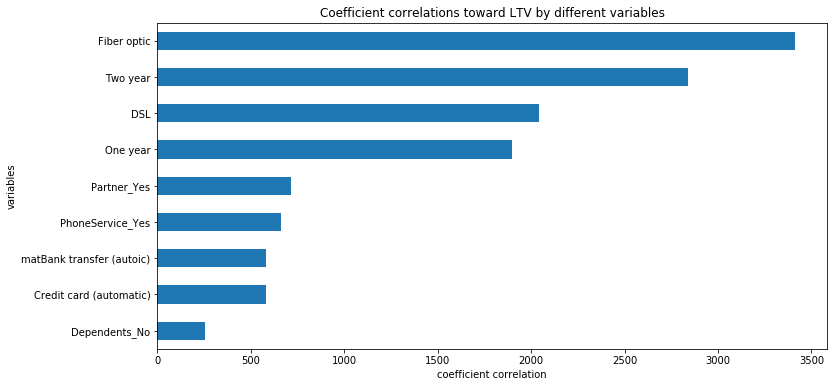

In [295]:
# Visualize the order of the variables that affects LTV from high to low.
plt.figure(figsize = [12, 6])
results.params.sort_values()[3:].plot.barh()
desc(xlabel="coefficient correlation", ylabel='variables',title='Coefficient correlations toward LTV by different variables');

In [276]:
# convert the categorical variables to 0,1
clean_df[['No','No internet service', 'OnlineSecurity_yes']] = pd.get_dummies(clean_df['OnlineSecurity'])
clean_df[['No','No internet service', 'OnlineBackup_yes']] = pd.get_dummies(clean_df['OnlineBackup'])
clean_df[['No','No internet service', 'DeviceProtection_yes']] = pd.get_dummies(clean_df['DeviceProtection'])
clean_df[['No','No internet service', 'TechSupport_yes']] = pd.get_dummies(clean_df['TechSupport'])
clean_df[['No','No internet service', 'StreamingTV_yes']] = pd.get_dummies(clean_df['StreamingTV'])
clean_df[['No','No internet service', 'StreamingMovies_yes']] = pd.get_dummies(clean_df['StreamingMovies'])

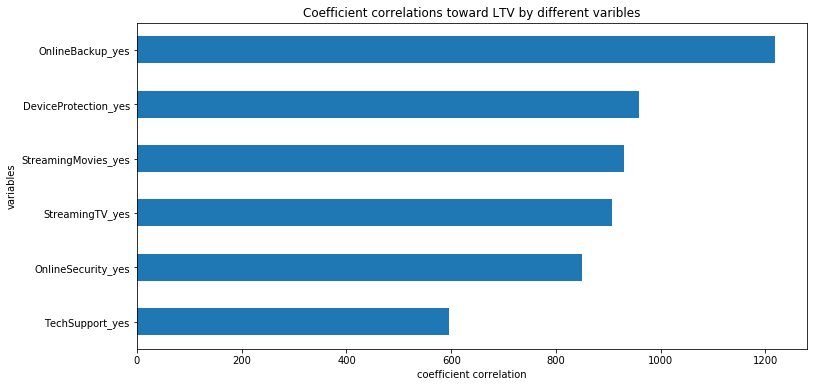

In [283]:
# use mutiple linear regression
# and visualize the order of the variables that affects LTV from high to low.
clean_df['intercept'] = 1
lm = sm.OLS(clean_df['TotalCharges'], clean_df[['intercept', 'OnlineSecurity_yes', 'OnlineBackup_yes', 'DeviceProtection_yes',
                                               'TechSupport_yes', 'StreamingTV_yes', 
                                                'StreamingMovies_yes']])
results = lm.fit()
plt.figure(figsize = [12, 6])
results.params.sort_values()[1:].plot.barh();
desc(xlabel="coefficient correlation", ylabel='variables',title='Coefficient correlations toward LTV by different varibles');

> Note: Online Backup affects the LTV the most, whose coefficient correlation is 2 times as much as tech support.

## Conclusion

> Limitation 1 : In this dataset, we can only see one type of each variables instead of real world situation of changing different options as time passes, e.g., in real world, people might wanna try streaming service, but they might change their mind to leave the service next month. 

> Limitation 2 : We cannot only see these variables as whole factors to understand the exact reasons why customers left because they might leave for better price offered by competitors or the bad economy in certian time, etc. We also cannot see the time they leaked, so it's hard to infer those external situation.

#### Research Question 1:  For those who unsubscribed the service, what was their average LTV(Life Time Value)? and how long did they usually stay in the service?

> I found that around 20% of the data are extremely high, so I decided to divide them to see each distribution of data.

> The average LTV of 80% of those who unsubscribed is 750 dollars, and its tenures is near 10 months. On the other hand, the average LTV of top 20% of those who unsubscribed is 4750 dollars, and its tenures is near 50 months. And the ratio by the sum of total LTV by each groups is 750*4 : 4750 = 1 : 1.6, which suggests we should focus on serving those 20% customers with high LTV, which brought 60%(1.6/2.6) of our revennue.

#### Research Question 2: Relating to Question 1, what kinds of service they subscribed when they were still staying in subscription?

> Because I just found that there is a big difference in LTV and tenures between 80/20% of those who unsubscribed, so I decided to investigate this question in both 80/20% groups, too.

> 20%(high LTV) of data has only 2% who didn't use the phone service. On the other hand, 80%(low LTV) of data has 11% who didn't use the phone service, which is 5 times as much as the phone service proportion of 20%(high LTV) of data.

> 20%(high LTV) of data of those who used phone service has 84% used multiple lines, which is 2 times as much as the proportion of multiple lines in 80%(low LTV) of data of those who used phone service.

> I found all of those with high LTV all used internet service. On the other hand, the 80% of those with low LTV has 8% did not use internet service. And, in 20%(high LTV) of data , there is 90% of people used fiber optic as their internet service.

for each subsets of internet services:

1.	The proportion of streaming movies and streaming tv service in 20%(high LTV) of data are both near 80%, which is 2 times as much as the corresponded proportion in 80%(low LTV) of data.
2.	The proportion of device protection and online backup service are both near 58%, which is 2.5-3 times as much as the corresponded proportion in 80%(low LTV) of data.
3.	The proportion of tech support and online security service are both near 31%, which is near 2.5-3 times as much as the corresponded proportion in 80%(low LTV) of data.
       
#### Research Question 3: For those who are still paying the service, what was their average LTV(Life Time Value)? and how long did they usually stay in the service?

> The mean LTV in 80%(low LTV) of data is 1589, and the one in 20%(high LTV) of data is 6389. The mean tenures in 80%(low LTV) of data is 30, and the one in 20%(high LTV) of data is 65. And the ratio by the sum of total LTV by each groups is 1590*4 : 6389 = 1 : 1, which suggests we should focus on serving those 20% customers with high LTV, which brought 50%(1/2) of our revenue.

#### Research Question 4: Relating to Question 3, what are the proportions of each kinds of service they are paying?

> Because There is a big difference in LTV and tenures between 80/20% of data of current customers, so I decided to investigate this question in both 80/20% groups, too.

> 20%(high LTV) of data has only 2% who didn't use the phone service. On the other hand, 80%(low LTV) of data has 11% who didn't use the phone service, which is 5 times as much as the phone service proportion of 20%(high LTV) of data.

> 20%(high LTV) of data of those who used phone service has 83% used multiple lines, which is 2.4 times as much as the proportion of multiple lines in 80%(low LTV) of data of those who used phone service.

> I found all of those with high LTV all used internet service. On the other hand, the 80% of those with low LTV has 33% did not use internet service. And, in 20%(high LTV) of data, there is 90% of people used fiber optic as their internet service.

for each subsets of internet services:

1.	All the proportions of each internet services in 80%(low LTV) of data are near 40%.
2.	In 20%(high LTV) of data, both streaming movies and streaming tv are near 80%, the proportions of both device protection and online backup are near 75%, and the proportions of techsupport and online seciroty are near 62%

#### Research Question 5: For those who are still in service with LTV more than the LTV of leaked customers, which service they are paying the most?

> For phone service:
1.	In 80%(low LTV) of data of current customers, whose LTV are higher than the LTV In 80%(low LTV) of data of leaked customers, there are 86% are using phone service.
2.	In 20%(high LTV) of data of current customers, whose LTV are higher than the LTV In 20%(high LTV) of data of leaked customers, there are 100% are using phone service.

> For phone service with multiple lines:
1.	In 80%(low LTV) of data of current customers, whose LTV are higher than the LTV In 80%(low LTV) of data of leaked customers, there are 48% using phone service with multiple lines.
2.	In 20%(high LTV) of data of current customers, whose LTV are higher than the LTV In 20%(high LTV) of data of leaked customers, there are 89% are using phone service.

> For internet service:
1.	In 80%(low LTV) of data of current customers, whose LTV are higher than the LTV In 80%(low LTV) of data of leaked customers, there are 22% are not using internet service
2.	In 20%(high LTV) of data of current customers, whose LTV are higher than the LTV In 20%(high LTV) of data of leaked customers, there are 100% are using internet service.

> For subsets of internet service:
1.	In 80%(low LTV) of data of current customers, whose LTV are higher than the LTV In 80%(low LTV) of data of leaked customers, there are all the proportions of each internet services in 80%(low LTV) of data are near 45%.
2.	In 20%(high LTV) of data of current customers, whose LTV are higher than the LTV In 20%(high LTV) of data of leaked customers, both streaming movies and streaming tv are near 90%, the proportions of both device protection and online backup are near 70%, and the proportions of techsupport and online seciroty are near 37%.

#### Research Question 6: For two groups of those who leaked and still are paying the service, what is the proportion of each kinds of contract by each group?

1. In the data of leaked customers, there are 88% used month contract, 9% used one year contract, and 2 % two year contract.

2. In the data of current customers, there are 43% using month contract, 25% used one year contract, and 32% two year contract.

#### Research Question 7: Relating to Question 3, what are the proportions of each kinds of service they are paying?

> Coefficient correlations toward LTV by different variables:
1. 'gender' does not have statistical significance on affecting the LTV.
2. 'Partner' have statistical significance on affecting the LTV, whose coefficient correlation is 717.
3. 'Dependents' have statistical significance on affecting the LTV, whose coefficient correlation is 254.
4. 'PhoneService' have statistical significance on affecting the LTV, whose coefficient correlation is 662.
5. 'InternetService' have statistical significance on affecting the LTV, for 'DSL', whose coefficient correlation is 2043. And, for 'Fiber optic', whose coefficient correlation is 3412.
6. 'Contract' have statistical significance on affecting the LTV, for 'One year', whose coefficient correlation is 1897. And, for 'Two year', whose coefficient correlation is 2840.
7. 'PaymentMethod' have statistical significance on affecting the LTV, for 'matBank transfer', whose coefficient correlation is 583. And, for 'Credit card (automatic)', whose coefficient correlation is 579.

> Coefficient correlations toward LTV by each subsets of internet service:
1. Online Backup affects the LTV the most, whose coefficient correlation is 2 times as much as tech support.